In [9]:
%%time
## Loading the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

CPU times: total: 0 ns
Wall time: 0 ns


In [10]:
## Setting working directory
import os
os.chdir('C:\\Users\\adity\\Second-Semester\\PDS\\Group-Project\\')

In [11]:
%%time

## Setting data directory
data_dir = "C:\\Users\\adity\\Second-Semester\\PDS\\Group-Project\\"

## Loading the datasets
aisles = pd.read_csv(data_dir + 'aisles.csv')
departments = pd.read_csv(data_dir + 'departments.csv')
prior = pd.read_csv(data_dir + 'order_products__prior.csv')
train = pd.read_csv(data_dir + 'order_products__train.csv')
orders = pd.read_csv(data_dir + 'orders.csv')
products = pd.read_csv(data_dir + 'products.csv')

CPU times: total: 8.09 s
Wall time: 8.86 s


In [12]:
%%time
orders_combined = pd.concat([prior,train],axis = 0) ## Concatenating the train and prior datasets to get all the order info

CPU times: total: 375 ms
Wall time: 497 ms


In [13]:
%whos DataFrame

Variable          Type         Data/Info
----------------------------------------
aisles            DataFrame         aisle_id            <...>n\n[134 rows x 2 columns]
data              DataFrame              order_id  produ<...>819106 rows x 15 columns]
departments       DataFrame        department_id       d<...>      21          missing
df1               DataFrame              order_id  produ<...>3819106 rows x 7 columns]
df2               DataFrame              order_id  produ<...>3819106 rows x 8 columns]
df3               DataFrame              order_id  produ<...>3819106 rows x 9 columns]
orders            DataFrame             order_id  user_i<...>3421083 rows x 7 columns]
orders_combined   DataFrame             order_id  produc<...>3819106 rows x 4 columns]
prior             DataFrame              order_id  produ<...>2434489 rows x 4 columns]
products          DataFrame           product_id        <...>n[49688 rows x 4 columns]
train             DataFrame             order_id

In [14]:
%%time

## Merging all the datasets to get a consolidate dataframe

df1=orders_combined.merge(products, how='left', on='product_id')
df2 = df1.merge(aisles, how='left', on='aisle_id')
df3 = df2.merge(departments, how='left', on='department_id')
data = df3.merge(orders, how='inner', on='order_id')

CPU times: total: 36.1 s
Wall time: 53.4 s


In [15]:
%whos DataFrame

Variable          Type         Data/Info
----------------------------------------
aisles            DataFrame         aisle_id            <...>n\n[134 rows x 2 columns]
data              DataFrame              order_id  produ<...>819106 rows x 15 columns]
departments       DataFrame        department_id       d<...>      21          missing
df1               DataFrame              order_id  produ<...>3819106 rows x 7 columns]
df2               DataFrame              order_id  produ<...>3819106 rows x 8 columns]
df3               DataFrame              order_id  produ<...>3819106 rows x 9 columns]
orders            DataFrame             order_id  user_i<...>3421083 rows x 7 columns]
orders_combined   DataFrame             order_id  produc<...>3819106 rows x 4 columns]
prior             DataFrame              order_id  produ<...>2434489 rows x 4 columns]
products          DataFrame           product_id        <...>n[49688 rows x 4 columns]
train             DataFrame             order_id

In [16]:
## Deleting unnecessary datasets to clear up memory
del df1, df2, df3, orders_combined, aisles, departments, orders, prior, products, train

In [17]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
data       DataFrame              order_id  produ<...>819106 rows x 15 columns]


### Missing Value Treatment

In [18]:
data_cols = list(data.columns)
print('Fields :')
print("")
print(*data_cols, sep = '\n')
print("")

Fields :

order_id
product_id
add_to_cart_order
reordered
product_name
aisle_id
department_id
aisle
department
user_id
eval_set
order_number
order_dow
order_hour_of_day
days_since_prior_order



In [19]:
data.department.unique()

array(['dairy eggs', 'produce', 'pantry', 'meat seafood', 'bakery',
       'personal care', 'snacks', 'breakfast', 'beverages', 'deli',
       'household', 'international', 'dry goods pasta', 'frozen',
       'canned goods', 'babies', 'pets', 'alcohol', 'bulk', 'missing',
       'other'], dtype=object)

In [20]:
data.aisle.unique()

array(['eggs', 'fresh vegetables', 'spices seasonings', 'oils vinegars',
       'baking ingredients', 'doughs gelatins bake mixes', 'spreads',
       'packaged vegetables fruits', 'yogurt', 'soy lactosefree',
       'poultry counter', 'bread', 'breakfast bakery', 'cold flu allergy',
       'energy granola bars', 'breakfast bars pastries', 'chips pretzels',
       'trail mix snack mix', 'crackers', 'refrigerated',
       'energy sports drinks', 'fresh fruits', 'salad dressing toppings',
       'prepared soups salads', 'milk', 'paper goods',
       'water seltzer sparkling water', 'kosher foods',
       'packaged poultry', 'packaged cheese', 'instant foods',
       'packaged produce', 'cookies cakes', 'candy chocolate',
       'body lotions soap', 'dry pasta', 'laundry',
       'air fresheners candles', 'frozen produce', 'buns rolls',
       'canned fruit applesauce', 'juice nectars', 'granola',
       'fresh herbs', 'baby food formula', 'canned meals beans', 'cream',
       'meat counte

In [21]:
data.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.174104e+07
mean,1.710566e+06,2.557551e+04,8.367738e+00,5.900617e-01,7.121799e+01,9.918544e+00,1.029444e+05,1.713998e+01,2.737285e+00,1.343123e+01,1.136415e+01
std,9.874008e+05,1.409770e+04,7.139540e+00,4.918220e-01,3.819898e+01,6.281655e+00,5.946733e+04,1.749829e+01,2.093296e+00,4.246149e+00,8.940500e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.554130e+05,1.351900e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.143500e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,1.710660e+06,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,1.026260e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,2.565587e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.544120e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [18]:
data.product_name.unique()

array(['Organic Egg Whites', 'Michigan Organic Kale', 'Garlic Powder',
       ..., 'Ultra Sun Blossom Liquid 90 loads Fabric Enhancers',
       'Sweetart Jelly Beans', 'Water With Electrolytes'], dtype=object)

### Checking for missing values in textual columns

In [19]:
data[data['product_name'] == 'missing']

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [20]:
data[data['department'] == 'missing']['department_id'].unique()

array([21], dtype=int64)

In [21]:
data[data['department_id'] == 21]['department'].unique()

array(['missing'], dtype=object)

In [22]:
data[data['aisle'] == 'missing']['aisle_id'].unique()

array([100], dtype=int64)

In [23]:
data[data['aisle_id'] == 100]['aisle'].unique()

array(['missing'], dtype=object)

In [24]:
%%time

print('********************************************')
print("              INITAL INFO")
print('********************************************')
print('No. of Rows:',data.shape[0])
print('No. of Columns:',data.shape[1])
print("")
missing_values = data[data['aisle'] == 'missing'].shape[0]
print("Records with missing Aisle and Department values :",missing_values)
print("")
print('Null values present:')
print("")
print(data.isna().sum())
print("")
print('********************************************')
print("              INITIAL DATA STATS")
print('********************************************')
print('Distinct Customers =',data.user_id.nunique())
print('Distinct Orders =',data.order_id.nunique())
print('Distinct Aisles =',data.aisle_id.nunique())
print('Distinct Departments =',data.department_id.nunique())
print('Distinct Products =',data.product_id.nunique())
print("")

********************************************
              INITAL INFO
********************************************
No. of Rows: 33819106
No. of Columns: 15

Records with missing Aisle and Department values : 77396

Null values present:

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

********************************************
              INITIAL DATA STATS
********************************************
Distinct Customers = 206209
Distinct Orders = 3346083
Distinct Aisles = 134
Distinct Departments = 21
Distinct Prod

In [20]:
data.drop(['eval_set'], axis =1, inplace = True) ## Dropping eval_set as we'll be deploying an unsupervised lerning technique
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,3,5,9,8.0


In [21]:
data = data[data['aisle'] != 'missing']

In [22]:
%%time
data.fillna(0, inplace = True)

Wall time: 4.5 s


In [23]:
%%time

print('**************************************************************')
print("              INFO POST MISSING VALUE TREATMENT")
print('**************************************************************')
print('No. of Rows:',data.shape[0])
print('No. of Columns:',data.shape[1])
print("")
missing_values = data[data['aisle'] == 'missing'].shape[0]
print("Records with missing Aisle and Department values :",missing_values)
print("")
print('Null values present:')
print("")
print(data.isna().sum())
print("")
print('**************************************************************')
print("              POST MISSING VALUE TREATMENT STATS")
print('**************************************************************')
print('Distinct Customers =',data.user_id.nunique())
print('Distinct Orders =',data.order_id.nunique())
print('Distinct Aisles =',data.aisle_id.nunique())
print('Distinct Departments =',data.department_id.nunique())
print('Distinct Products =',data.product_id.nunique())
print("")

**************************************************************
              INFO POST MISSING VALUE TREATMENT
**************************************************************
No. of Rows: 33741710
No. of Columns: 14

Records with missing Aisle and Department values : 0

Null values present:

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

**************************************************************
              POST MISSING VALUE TREATMENT STATS
**************************************************************
Distinct Customers = 206209
Distinct Orders = 3345855
Distinct Aisles = 133
Distinct Departments = 20
Distinct Products = 48427

## Exploratory Analysis

### Most popular day of week for orders

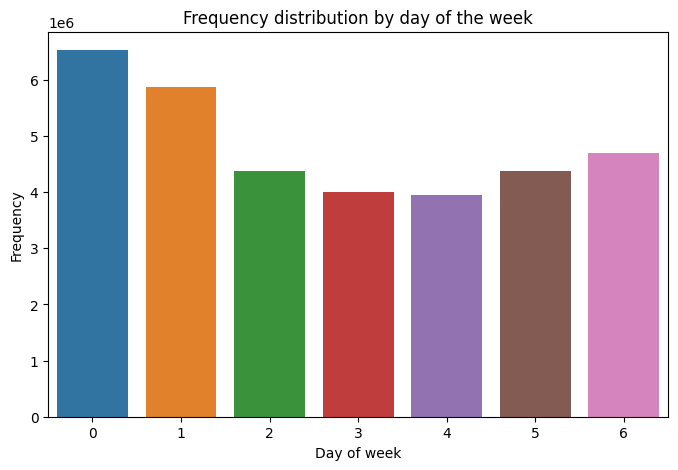

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x="order_dow", data=data)
plt.ylabel("Frequency")
plt.xlabel("Day of week")
plt.title("Frequency distribution by day of the week")
#plt.savefig("Figures/Frequency distribution of orders by day of the week.jpg")
plt.show()

### Most popular time of day for orders

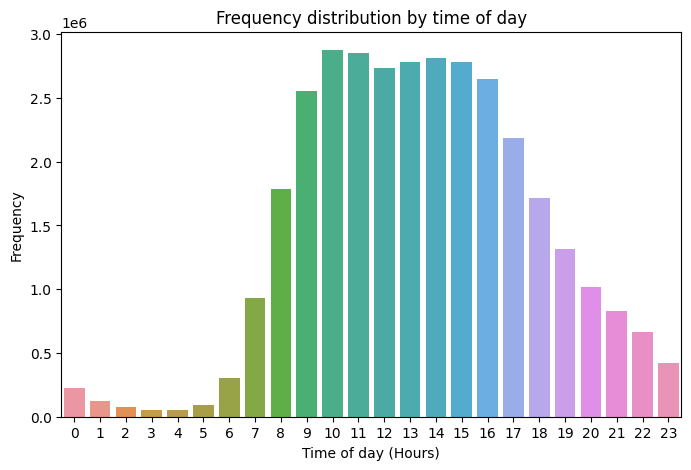

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x="order_hour_of_day", data=data)
plt.ylabel("Frequency")
plt.xlabel("Time of day (Hours)")
plt.title("Frequency distribution by time of day")
#plt.savefig("Figures/Frequency distribution by hour of day - Overall.jpg")
plt.show()

### Heattmap : Day of week v/s Hour of day

C:\Users\adity\AppData\Local\Temp\ipykernel_2176\1058499266.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  day_time_dist = day_time_dist.pivot('order_dow', 'order_hour_of_day', 'order_number')


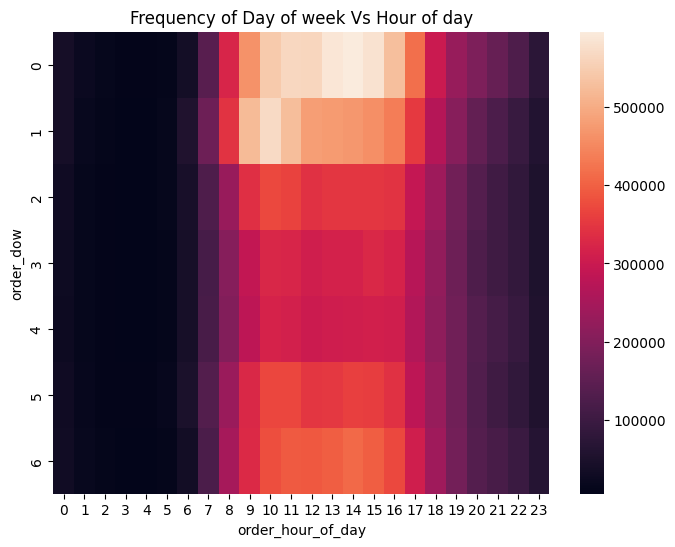

In [30]:
day_time_dist = data.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
day_time_dist = day_time_dist.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(8,6))
sns.heatmap(day_time_dist)
plt.title("Frequency of Day of week Vs Hour of day")
#plt.savefig("Figures/Frequency of Day of week Vs Hour of day.jpg")
plt.show()

### Frequency distribution by days since prior order

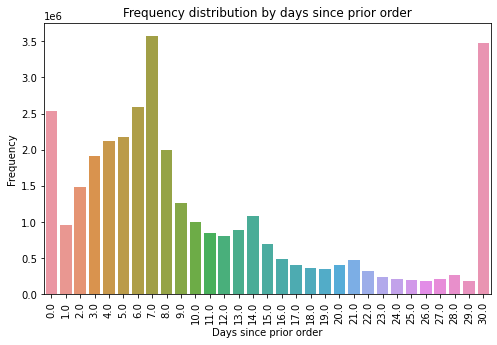

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x="days_since_prior_order", data=data)
plt.ylabel('Frequency')
plt.xlabel('Days since prior order')
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order")
plt.savefig("Figures/Frequency distribution by days since prior order.jpg")
plt.show()

### Departments

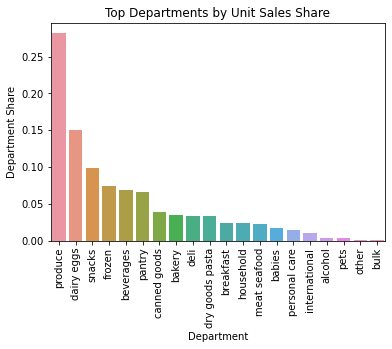

In [36]:
dept_share = data.groupby('department')['add_to_cart_order'].sum().reset_index()
dept_share['department_share'] = dept_share['add_to_cart_order']/(dept_share['add_to_cart_order'].sum())

x = sns.barplot(data = dept_share.sort_values(by = 'department_share',ascending = False), x = 'department', y = 'department_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Department', ylabel = 'Department Share')
x.set_title("Top Departments by Unit Sales Share")
print("")
plt.savefig('Figures/Top Departments by Unit Sales Share.jpg', dpi=400, bbox_inches='tight')

### Aisles

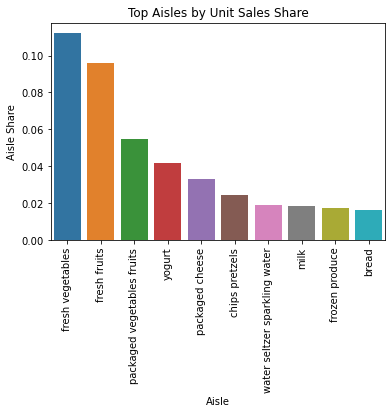

In [37]:
aisle_share = data.groupby('aisle')['add_to_cart_order'].sum().reset_index()
aisle_share['aisle_share'] = aisle_share['add_to_cart_order']/ (aisle_share['add_to_cart_order'].sum())

x = sns.barplot(data = aisle_share.sort_values(by = 'aisle_share',ascending = False)[0:10], x = 'aisle', y = 'aisle_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Aisle', ylabel = 'Aisle Share')
x.set_title("Top Aisles by Unit Sales Share")
print("")
plt.savefig('Figures/Top Aisles by Units Sale Share.jpg', dpi=400, bbox_inches='tight')

### Products

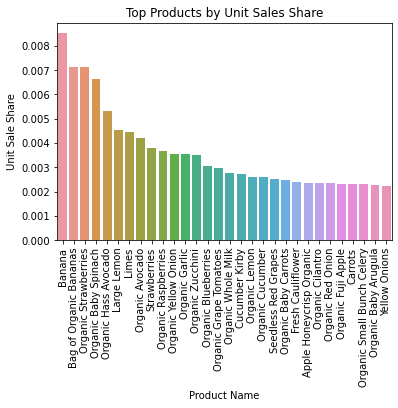

In [38]:
prod_share = data.groupby('product_name')['add_to_cart_order'].sum().reset_index()
prod_share['product_share'] = prod_share['add_to_cart_order']/ (prod_share['add_to_cart_order'].sum())

x = sns.barplot(data = prod_share.sort_values(by = 'product_share',ascending = False)[0:30], 
                                              x = 'product_name', y = 'product_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Product Name', ylabel = 'Unit Sale Share')
x.set_title("Top Products by Unit Sales Share")
print("")
plt.savefig('Figures/Top Products by Units Sale Share.jpg', dpi=400, bbox_inches='tight')

## Data preparation for customer segmentation

In [43]:
%%time
## Volume (no. of products) purchased per user at an aisle level
aisle_agg = data[['user_id','add_to_cart_order','aisle']].groupby(['user_id','aisle']).sum().reset_index()
## Volume purchased per user at a department level
dept_agg = data[['user_id','add_to_cart_order','department']].groupby(['user_id','department']).sum().reset_index()

CPU times: total: 19 s
Wall time: 34.6 s


In [44]:
%%time
## Total Volume purchased per user
user_vol = aisle_agg.groupby('user_id')['add_to_cart_order'].sum().reset_index().rename(columns = 
                                                                                            {'add_to_cart_order':'volume'})

## Merging total volume purchased per user with aisle level aggregations
aisle_agg = aisle_agg.merge(user_vol, how = 'inner', on = 'user_id') 

## Merging total volume purchased per user with department level aggregations
dept_agg = dept_agg.merge(user_vol, how = 'inner', on = 'user_id')

CPU times: total: 453 ms
Wall time: 849 ms


In [45]:
%%time
aisle_agg['aisle_share'] = aisle_agg['add_to_cart_order'] / aisle_agg['volume'] ## Computing the aisle share
dept_agg['dept_share'] = dept_agg['add_to_cart_order'] / dept_agg['volume'] ## Computing the department share

CPU times: total: 0 ns
Wall time: 71.4 ms


In [46]:
aisle_agg

,user_id,aisle,add_to_cart_order,volume,aisle_share
0,1,candy chocolate,8,280,0.028571
1,1,cereal,26,280,0.092857
2,1,cream,17,280,0.060714
3,1,fresh fruits,30,280,0.107143
4,1,milk,9,280,0.032143
...,...,...,...,...,...
5919835,206209,soft drinks,26,912,0.028509
5919836,206209,soy lactosefree,20,912,0.021930
5919837,206209,spices seasonings,9,912,0.009868
5919838,206209,trash bags liners,6,912,0.006579


In [50]:
%%time

## Transforming the base table into a table wherein:
## Each row represents a customer
## And the columns represent the share bought from each aisle/department

aisle_vol_piv = aisle_agg[['user_id','aisle','add_to_cart_order']].pivot(index = 'user_id', columns = 'aisle', values = 'add_to_cart_order')
aisle_share_piv = aisle_agg[['user_id','aisle','aisle_share']].pivot(index = 'user_id', columns = 'aisle', values = 'aisle_share')

dept_vol_piv = dept_agg[['user_id','department','add_to_cart_order']].pivot(index = 'user_id', columns = 'department', values = 'add_to_cart_order')
dept_share_piv = dept_agg[['user_id','department','dept_share']].pivot(index = 'user_id', columns = 'department', values = 'dept_share')

## Substituting NA values with Zeroes
aisle_vol_piv = aisle_vol_piv.fillna(value = 0)
aisle_share_piv = aisle_share_piv.fillna(value = 0)
dept_vol_piv = dept_vol_piv.fillna(value = 0)
dept_share_piv = dept_share_piv.fillna(value = 0)

CPU times: total: 5.66 s
Wall time: 7.58 s


In [51]:
%whos DataFrame

Variable               Type         Data/Info
---------------------------------------------
X                      DataFrame             user_id  product<...>3819106 rows x 5 columns]
X_test                 DataFrame              user_id  produc<...>6763822 rows x 5 columns]
X_train                DataFrame              user_id  produc<...>7055284 rows x 5 columns]
aisle_agg              DataFrame             user_id         <...>5919840 rows x 5 columns]
aisle_share_piv        DataFrame    aisle    air fresheners c<...>06209 rows x 134 columns]
aisle_vol_piv          DataFrame    aisle    air fresheners c<...>06209 rows x 134 columns]
all_orders             DataFrame             order_id  user_i<...>819106 rows x 10 columns]
data                   DataFrame              order_id  produ<...>819106 rows x 15 columns]
dept_agg               DataFrame             user_id     depa<...>2281154 rows x 5 columns]
dept_share_piv         DataFrame    department  alcohol    ba<...>206209 rows x 

In [52]:
dept_share_piv

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.00,0.000000,0.000000,0.125000,0.092857,0.0,0.000000,0.271429,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.0,0.107143,0.335714
2,0.00,0.000000,0.012939,0.034658,0.009704,0.0,0.040665,0.209335,0.091959,0.000000,...,0.000000,0.010628,0.005545,0.000000,0.000000,0.040665,0.011091,0.0,0.159889,0.143715
3,0.00,0.000000,0.000000,0.040921,0.000000,0.0,0.000000,0.158568,0.028133,0.038363,...,0.012788,0.000000,0.000000,0.000000,0.000000,0.038363,0.000000,0.0,0.452685,0.145780
4,0.04,0.000000,0.080000,0.120000,0.000000,0.0,0.020000,0.000000,0.100000,0.000000,...,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.220000,0.020000
5,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.032129,0.196787,0.004016,0.008032,...,0.020080,0.076305,0.000000,0.000000,0.000000,0.032129,0.000000,0.0,0.570281,0.032129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.00,0.009828,0.017199,0.012285,0.000000,0.0,0.000000,0.358722,0.120393,0.000000,...,0.000000,0.044226,0.029484,0.049140,0.000000,0.046683,0.000000,0.0,0.260442,0.000000
206206,0.00,0.000000,0.002745,0.086002,0.002745,0.0,0.050320,0.095151,0.016468,0.001830,...,0.035682,0.021958,0.016468,0.000000,0.002745,0.080512,0.032937,0.0,0.260750,0.122598
206207,0.00,0.011862,0.015988,0.082001,0.021661,0.0,0.051573,0.161939,0.046416,0.048994,...,0.000000,0.002063,0.027849,0.000000,0.000000,0.090253,0.000000,0.0,0.202682,0.127385


In [53]:
aisle_share_piv

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.017857,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.025000
2,0.00000,0.010628,0.000000,0.0,0.000000,0.0,0.004159,0.00000,0.0,0.0,...,0.023105,0.003235,0.006932,0.000000,0.00000,0.000000,0.0,0.008318,0.0,0.186229
3,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.038363,0.012788,0.000000,0.000000,0.00000,0.000000,0.0,0.028133,0.0,0.000000
4,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.060000,0.00000,0.000000,0.0,0.040000,0.0,0.000000
5,0.02008,0.076305,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.064257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.00000,0.000000,0.009828,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.228501
206206,0.00000,0.021958,0.000000,0.0,0.000000,0.0,0.012809,0.00183,0.0,0.0,...,0.003660,0.000000,0.000000,0.000000,0.00000,0.003660,0.0,0.004575,0.0,0.000000
206207,0.00000,0.000000,0.000000,0.0,0.011862,0.0,0.000000,0.00000,0.0,0.0,...,0.008252,0.022692,0.000000,0.012893,0.00722,0.000000,0.0,0.033522,0.0,0.053120


## PCA for Dimensionality Reduction

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

FileNotFoundError: [Errno 2] No such file or directory: 'Figures/Variance % vs PCA Features.jpg'

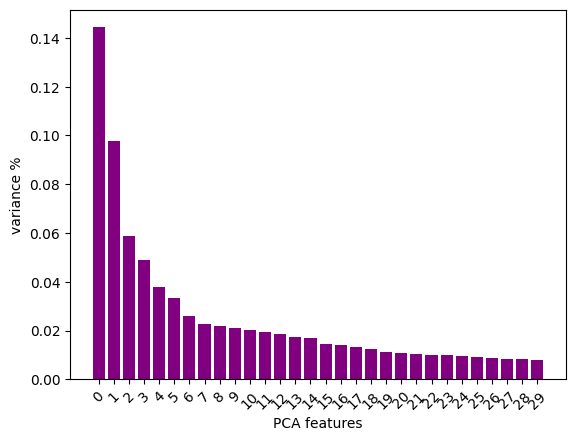

In [55]:
%%time
pca = PCA(n_components = 30)
principalComponents = pca.fit_transform(aisle_share_piv)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color = 'purple')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.xticks(rotation = 45)

PCA_components = pd.DataFrame(principalComponents)
plt.savefig('Figures/Variance % vs PCA Features.jpg', bbox_inches='tight')

### Pair Plot of PCA Components

FileNotFoundError: [Errno 2] No such file or directory: 'Figures/Pair Plot of PCA Components.jpg'

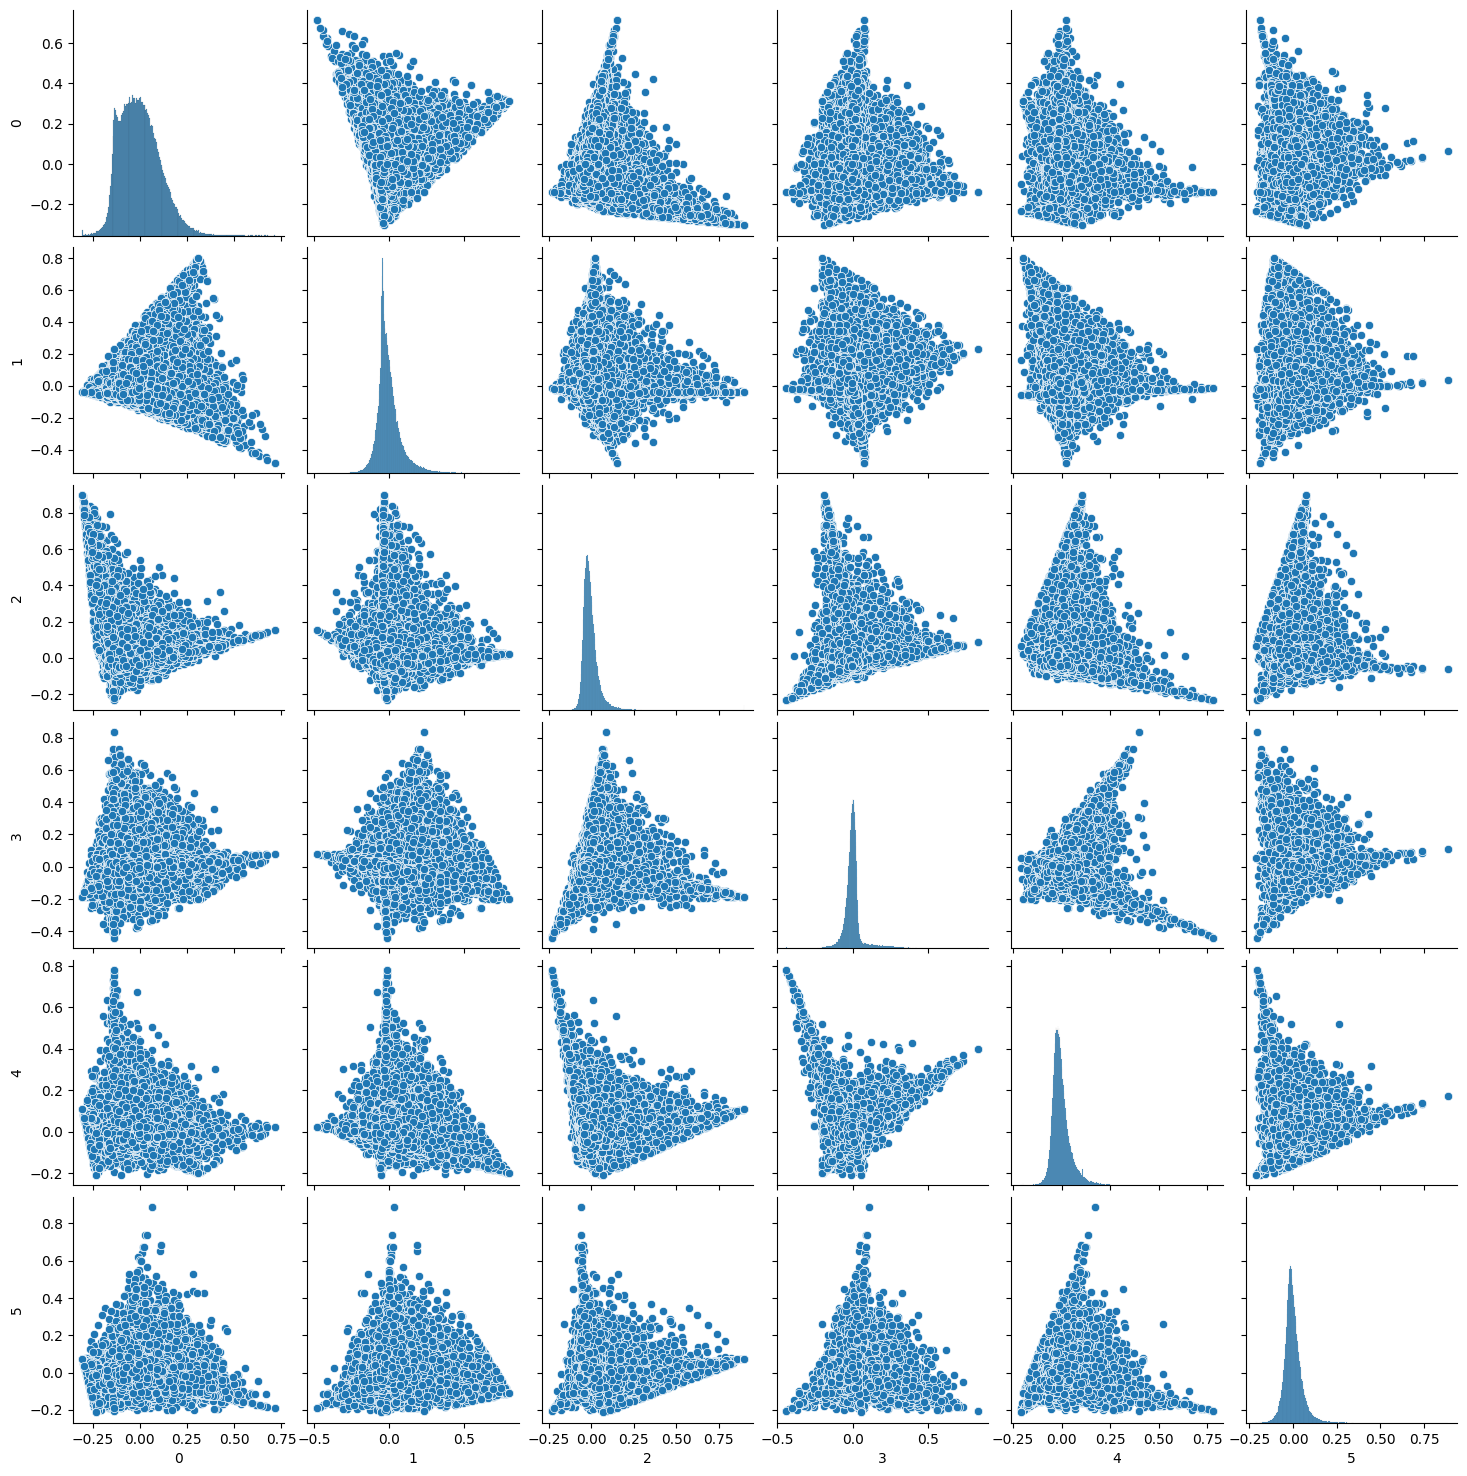

In [56]:
%%time

sns.pairplot(PCA_components[[0,1,2,3,4,5]])
print("")
plt.savefig('Figures/Pair Plot of PCA Components.jpg', bbox_inches='tight')

## kmeans Clustering

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 2



C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 3



C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 4



C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 5



C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 6



C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 7



C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 8



C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 9



C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 10



C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 11



C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 12



C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 13



C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 14



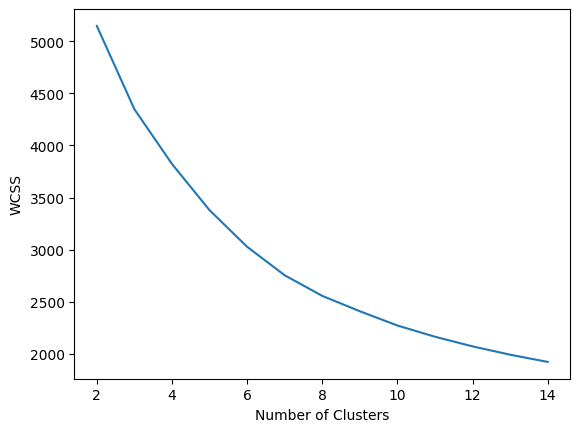

CPU times: total: 2min 45s
Wall time: 35.9 s


In [58]:
%%time
wss = {}
labels = {}
K = range(2,15)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(PCA_components[[0,1,2,3,4,5]])
    wss[k] = kmeans.inertia_
    labels[k] = kmeans.labels_
    print("K-Means processed for k=",k)
    print("")
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [55]:
centers = pd.DataFrame.from_dict(wss, orient='index').reset_index().rename(columns = {'index':'Clusters', 0:'WSS'})
centers

,Clusters,WSS
0,2,5172.134349
1,3,4370.253418
2,4,3841.941541
3,5,3396.683867
4,6,3043.733954
5,7,2767.923924
6,8,2569.519547
7,9,2421.631614
8,10,2283.418701
9,11,2174.948974


In [57]:
data.user_id.nunique()

206209

In [58]:
%%time

## Clubbing the PCA components and cluster labels
cluster_df = pd.concat([PCA_components[[0,1,2,3,4,5]],pd.Series(labels[6]).rename('cluster')], axis = 1)

Wall time: 20 ms


In [59]:
cluster_df

,0,1,2,3,4,5,cluster
0,-0.103536,0.048406,-0.031841,-0.005104,-0.052794,-0.055039,1
1,-0.078234,0.077940,-0.076190,-0.102570,0.080712,-0.040004,1
2,0.057084,0.085735,0.001869,-0.012541,-0.028985,0.113021,3
3,-0.055881,0.134633,-0.002237,-0.036645,-0.088069,-0.027561,2
4,0.133678,-0.019483,-0.021091,-0.004071,0.057342,0.139165,3
...,...,...,...,...,...,...,...
206204,-0.017316,0.088300,-0.075846,-0.095354,0.164143,-0.023124,3
206205,-0.040591,-0.036797,-0.024151,0.010472,-0.051143,0.000681,1
206206,-0.022375,-0.032704,-0.009552,-0.015954,0.021188,0.020505,3
206207,-0.002028,-0.010538,-0.037729,-0.008029,0.028668,0.045144,3


### Clusters of the 6 PCA components plotted in a scatterplot matrix

Wall time: 7min 22s


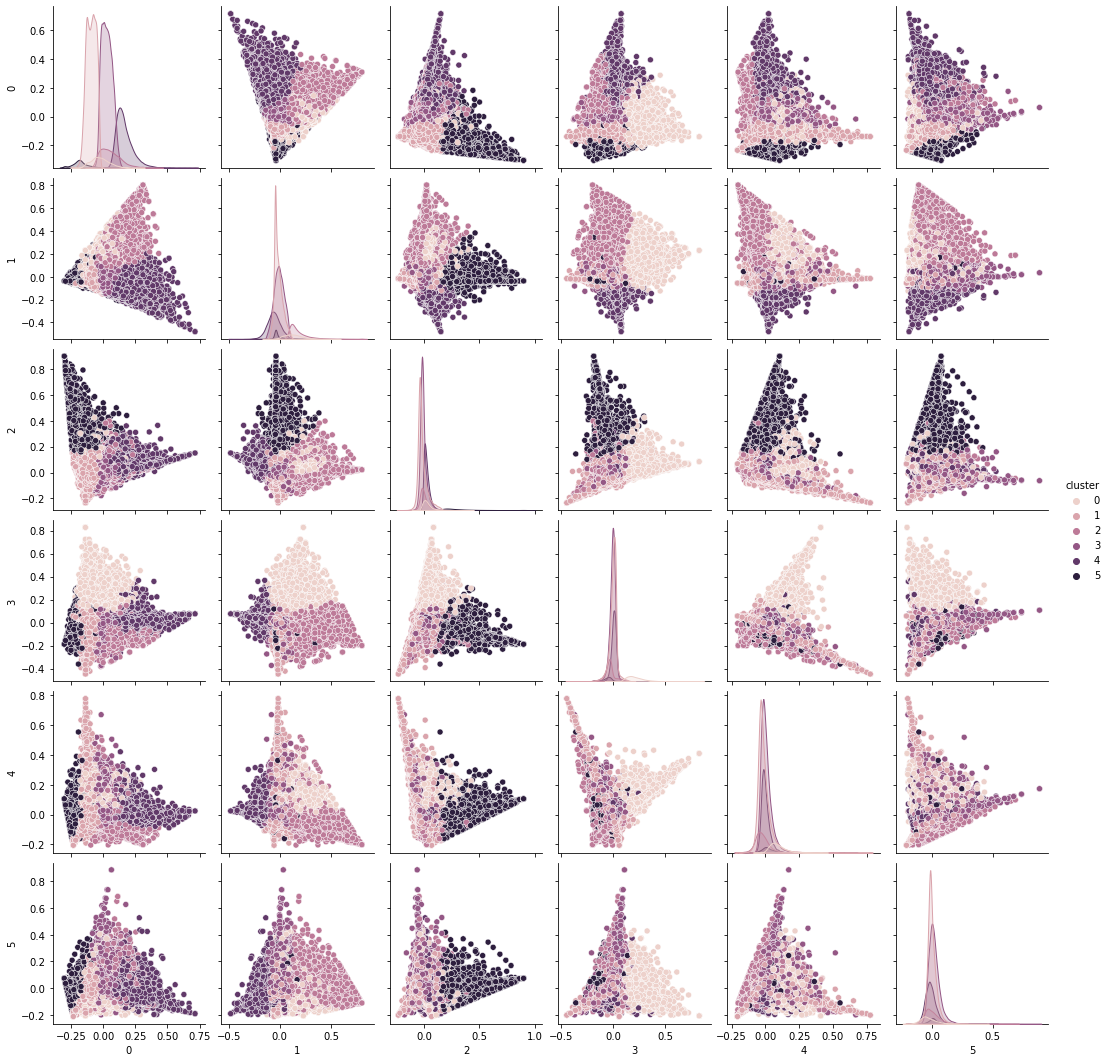

In [60]:
%%time
sns.pairplot(cluster_df, hue = 'cluster')
plt.savefig('Figures/Pair Plot of cluster_df.jpg', bbox_inches='tight')

## Data Preparation for Cluster Analysis

In [61]:
%%time
cluster_df = pd.concat([pd.Series(aisle_share_piv.index),cluster_df],axis = 1)

Wall time: 6.46 ms


In [62]:
cluster_df

,user_id,0,1,2,3,4,5,cluster
0,1,-0.103536,0.048406,-0.031841,-0.005104,-0.052794,-0.055039,1
1,2,-0.078234,0.077940,-0.076190,-0.102570,0.080712,-0.040004,1
2,3,0.057084,0.085735,0.001869,-0.012541,-0.028985,0.113021,3
3,4,-0.055881,0.134633,-0.002237,-0.036645,-0.088069,-0.027561,2
4,5,0.133678,-0.019483,-0.021091,-0.004071,0.057342,0.139165,3
...,...,...,...,...,...,...,...,...
206204,206205,-0.017316,0.088300,-0.075846,-0.095354,0.164143,-0.023124,3
206205,206206,-0.040591,-0.036797,-0.024151,0.010472,-0.051143,0.000681,1
206206,206207,-0.022375,-0.032704,-0.009552,-0.015954,0.021188,0.020505,3
206207,206208,-0.002028,-0.010538,-0.037729,-0.008029,0.028668,0.045144,3


In [63]:
%whos DataFrame

Variable             Type         Data/Info
-------------------------------------------
PCA_components       DataFrame                  0         1<...>206209 rows x 30 columns]
aisle_agg            DataFrame             user_id         <...>5888890 rows x 5 columns]
aisle_share          DataFrame                             <...>n\n[133 rows x 3 columns]
aisle_share_piv      DataFrame    aisle    air fresheners c<...>06209 rows x 133 columns]
aisle_vol_piv        DataFrame    aisle    air fresheners c<...>06209 rows x 133 columns]
centers              DataFrame        Clusters          WSS<...>12        14  1941.868104
cluster_df           DataFrame            user_id         0<...>[206209 rows x 8 columns]
data                 DataFrame              order_id  produ<...>741710 rows x 14 columns]
day_time_dist        DataFrame    order_hour_of_day     0  <...>\n\n[7 rows x 24 columns]
dept_agg             DataFrame             user_id     depa<...>2250204 rows x 5 columns]
dept_reorder

In [64]:
aisle_agg

,user_id,aisle,add_to_cart_order,volume,aisle_share
0,1,candy chocolate,8,280,0.028571
1,1,cereal,26,280,0.092857
2,1,cream,17,280,0.060714
3,1,fresh fruits,30,280,0.107143
4,1,milk,9,280,0.032143
...,...,...,...,...,...
5888885,206209,soft drinks,26,912,0.028509
5888886,206209,soy lactosefree,20,912,0.021930
5888887,206209,spices seasonings,9,912,0.009868
5888888,206209,trash bags liners,6,912,0.006579


In [65]:
%%time

## Merging cluster dataframe with Aisle level aggregations to get the cluster label per user
aisle_agg = aisle_agg.merge(cluster_df[['user_id','cluster']], on = 'user_id').rename(columns = 
                                                                                        {'aisle_share':'user_aisle_share'})
aisle_agg

Wall time: 953 ms


,user_id,aisle,add_to_cart_order,volume,user_aisle_share,cluster
0,1,candy chocolate,8,280,0.028571,1
1,1,cereal,26,280,0.092857,1
2,1,cream,17,280,0.060714,1
3,1,fresh fruits,30,280,0.107143,1
4,1,milk,9,280,0.032143,1
...,...,...,...,...,...,...
5888885,206209,soft drinks,26,912,0.028509,1
5888886,206209,soy lactosefree,20,912,0.021930,1
5888887,206209,spices seasonings,9,912,0.009868,1
5888888,206209,trash bags liners,6,912,0.006579,1


In [37]:
%%time

## Merging cluster dataframe with AiDepartmentsle level aggregations to get the cluster label per user 
dept_agg = dept_agg.merge(cluster_df, on = 'user_id').rename(columns ={'dept_share':'user_dept_share'})
dept_agg

NameError: name 'dept_agg' is not defined

In [67]:
dept_agg.drop([1,2,3,4,5,0], axis =1, inplace = True) ## Dropping irrelevant columns
dept_agg

,user_id,department,add_to_cart_order,volume,user_dept_share,cluster
0,1,beverages,35,280,0.125000,1
1,1,breakfast,26,280,0.092857,1
2,1,dairy eggs,76,280,0.271429,1
3,1,household,14,280,0.050000,1
4,1,pantry,5,280,0.017857,1
...,...,...,...,...,...,...
2250199,206209,international,11,912,0.012061,1
2250200,206209,meat seafood,18,912,0.019737,1
2250201,206209,pantry,75,912,0.082237,1
2250202,206209,produce,145,912,0.158991,1


In [68]:
dept_agg.cluster.unique()

array([1, 3, 2, 4, 5, 0])

In [69]:
%whos DataFrame

Variable             Type         Data/Info
-------------------------------------------
PCA_components       DataFrame                  0         1<...>206209 rows x 30 columns]
aisle_agg            DataFrame             user_id         <...>5888890 rows x 6 columns]
aisle_share          DataFrame                             <...>n\n[133 rows x 3 columns]
aisle_share_piv      DataFrame    aisle    air fresheners c<...>06209 rows x 133 columns]
aisle_vol_piv        DataFrame    aisle    air fresheners c<...>06209 rows x 133 columns]
centers              DataFrame        Clusters          WSS<...>12        14  1941.868104
cluster_df           DataFrame            user_id         0<...>[206209 rows x 8 columns]
data                 DataFrame              order_id  produ<...>741710 rows x 14 columns]
day_time_dist        DataFrame    order_hour_of_day     0  <...>\n\n[7 rows x 24 columns]
dept_agg             DataFrame             user_id     depa<...>2250204 rows x 6 columns]
dept_reorder

In [70]:
## Creating a dataframe for heatmap 
cluster_aisle = pd.DataFrame(columns = ['aisle','add_to_cart_order','aisle_share','cluster'])
for i in range(0,6):
    x = aisle_agg[aisle_agg['cluster'] == i]
    x = x.groupby('aisle')['add_to_cart_order'].sum().reset_index()
    x['aisle_share'] = x['add_to_cart_order']
    x['aisle_share'] = x['aisle_share'].apply(lambda f: f / x['add_to_cart_order'].sum()) ## computing unit share per aisle 
    x['cluster'] = i
    cluster_aisle = pd.concat([x,cluster_aisle], axis = 0)

In [39]:
cluster_aisle

NameError: name 'cluster_aisle' is not defined

In [72]:
aisle_agg

,user_id,aisle,add_to_cart_order,volume,user_aisle_share,cluster
0,1,candy chocolate,8,280,0.028571,1
1,1,cereal,26,280,0.092857,1
2,1,cream,17,280,0.060714,1
3,1,fresh fruits,30,280,0.107143,1
4,1,milk,9,280,0.032143,1
...,...,...,...,...,...,...
5888885,206209,soft drinks,26,912,0.028509,1
5888886,206209,soy lactosefree,20,912,0.021930,1
5888887,206209,spices seasonings,9,912,0.009868,1
5888888,206209,trash bags liners,6,912,0.006579,1


In [73]:
## Getting a list of top 20 aisles by aisle share
t20 = list(aisle_agg.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False)[0:20].index)
#t30 = list(aisle_agg.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False)[0:30].index)

### Heatmap illustrating share of purchases by aisle for the top 20 Instacart aisles

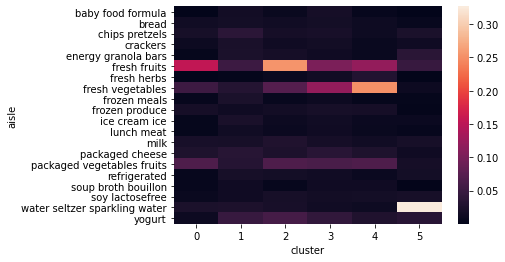

In [74]:
aisle_heat = cluster_aisle[cluster_aisle['aisle'].isin(t20)] ## Filtering for top 20 aisles
aisle_heat = aisle_heat.pivot(index = 'aisle', columns = 'cluster', values = 'aisle_share')
sns.heatmap(aisle_heat,cmap="rocket")
plt.savefig('Figures/Aisle vs Clusters Heatmap.jpg', bbox_inches='tight')
print("")

Wall time: 366 ms


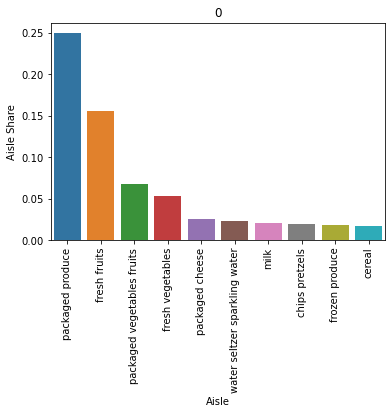

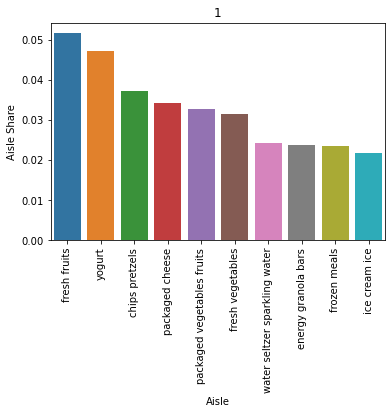

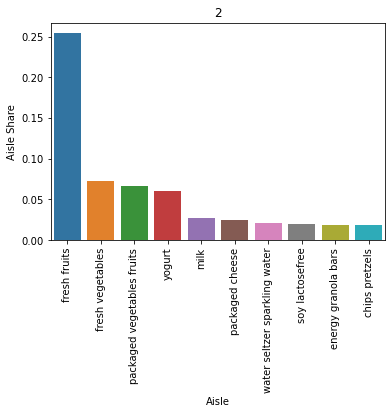

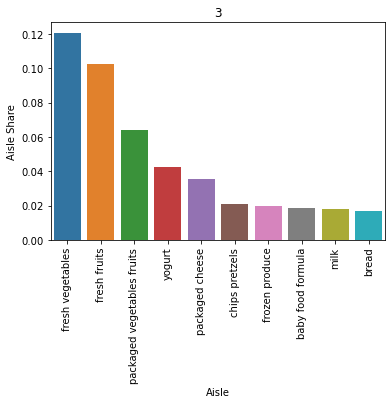

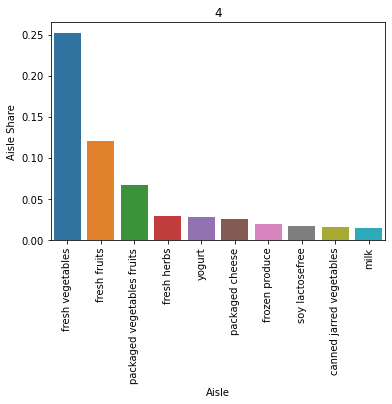

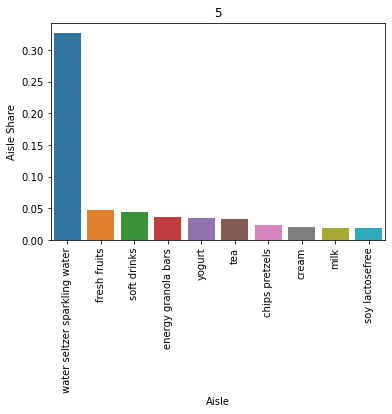

<Figure size 432x288 with 0 Axes>

In [75]:
%%time
for i in range(0,6):
    x = sns.barplot(data = cluster_aisle[cluster_aisle['cluster'] == i].sort_values('aisle_share', ascending = False)[0:10], x = 'aisle', y = 'aisle_share')
    x.set_xticklabels(x.get_xticklabels(), rotation=90)
    plt.title(str(i))
    x.set(xlabel = 'Aisle', ylabel = 'Aisle Share')
    plt.figure()
    plt.savefig("Figures/AisleCluster"+str(i)+".jpg", bbox_inches='tight')
    plt.clf()

In [76]:
## Computing User Share (% of users belonging to each cluster) and Unit Purchase Share (% of unit purchases wrt each cluster)

x = pd.concat([cluster_df['cluster'].value_counts().sort_index() / cluster_df['cluster'].value_counts().sum() * 100,
               cluster_aisle.groupby('cluster')['add_to_cart_order'].sum() / cluster_aisle['add_to_cart_order'].sum() * 100], axis = 1)

x.rename(columns = {'cluster':'User Share','add_to_cart_order':'Unit Purchase Share'})

,User Share,Unit Purchase Share
0,3.858706,0.787028
1,35.752562,29.820575
2,7.528284,3.721305
3,35.168688,49.448672
4,15.840240,15.861019
5,1.851520,0.361401


In [7]:
cluster_df.to_csv('cluster_df_new.csv') ##Writing to csv to use for cluster level analyses

NameError: name 'cluster_df' is not defined

#To predict if a product will be reordered or not

In [27]:
## import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [29]:
# load the data
orders = pd.read_csv('orders.csv')
order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv')

In [30]:
# merge the data
prior_orders = pd.merge(orders, order_products_prior, on='order_id')
train_orders = pd.merge(orders, order_products_train, on='order_id')
all_orders = pd.concat([prior_orders, train_orders], axis=0)

In [31]:
# select relevant features
features = ['user_id', 'product_id', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
X = all_orders[features]
y = all_orders['reordered']

In [32]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [35]:
# make predictions on the test set
y_pred = xgb_model.predict(X_test)

In [36]:
# evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy: 0.6634976497016036
Precision: 0.650421813296836
Recall: 0.9286153991143158
F1 Score: 0.7650126380809197
